<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Aranzazú Rendón Gómez, Héctor Daniel Chavez Orozco.
    
**Fecha:** 07 de mayo del 2021.

**Expediente:** 722272, 713442.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 11: Clase 24
    
Liga del repositorio: https://github.com/Aranzazu-R/Tarea9y10_HectorChavez_AranzazuRendon.git

# Enunciado Tarea
Realizar la valuación de las opciones barrera para las acciones de Microsoft, siguiendo los siguientes lineamientos:
1. Realizar la valuación para el tipo de opción barrera 'CALL'- down-and-out, usando la suposición de rendimientos normales y usando el método del histograma. Para ambas valuaciones, comparar los resultados de la evaluación obtenida con los resultados obtenidos por la valuación Europea. Como se realizó en clase.
2. Repetir el inciso anterior pero en esta ocasión para el caso de 'PUT'- Up-and-out.

**Nota:** Analice los datos descargados y según el método ya sea `down-and-out` o `Up-and-out` defina un strike price usando la volatility smile vista en la clase de opciones europeas y basado en el spot price y el strike defina una barrera adecuada.

Se habilitará un enlace en canvas para subir un cuaderno de python, con la solución.

**Criterio de revisión.**

> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

## RESPUESTA HECTOR

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

## CALL

In [3]:
closes = get_adj_closes(['MSFT'], '2017-01-01')
closes_ms = closes.loc[:,'MSFT']
closes_ms

Date
2017-01-03     58.538
2017-01-04     58.276
2017-01-05     58.276
2017-01-06     58.782
2017-01-09     58.595
               ...   
2021-04-30    252.180
2021-05-03    251.860
2021-05-04    247.790
2021-05-05    246.470
2021-05-06    249.730
Name: MSFT, Length: 1093, dtype: float64

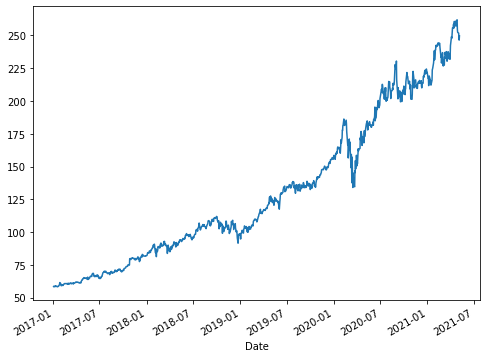

In [4]:
closes_ms.plot(figsize=(8,6));

In [5]:
closes_ms[-1]

249.72999572753906

## Calculamos rendimientos

In [6]:
ret_ms = calc_daily_ret(closes_ms)

## Descargamos datos de opciones para poder valuarlos

In [7]:
pd.set_option('display.max_rows', 10)

ms = web.YahooOptions('MSFT')
ms_opt = ms.get_all_data().reset_index()
ms_opt.set_index('Expiry').sort_index()#.head(1000)

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-05-07,200.0,call,MSFT210507C00200000,...,2021-05-06 23:59:52,2021-05-05 19:00:24,"{'contractSymbol': 'MSFT210507C00200000', 'str..."
2021-05-07,155.0,put,MSFT210507P00155000,...,2021-05-06 23:59:52,2021-04-23 17:46:50,"{'contractSymbol': 'MSFT210507P00155000', 'str..."
2021-05-07,120.0,put,MSFT210507P00120000,...,2021-05-06 23:59:52,2021-05-03 13:30:01,"{'contractSymbol': 'MSFT210507P00120000', 'str..."
2021-05-07,120.0,call,MSFT210507C00120000,...,2021-05-06 23:59:52,2021-05-06 19:59:12,"{'contractSymbol': 'MSFT210507C00120000', 'str..."
2021-05-07,252.5,put,MSFT210507P00252500,...,2021-05-06 23:59:52,2021-05-06 19:58:56,"{'contractSymbol': 'MSFT210507P00252500', 'str..."
...,...,...,...,...,...,...,...
2023-06-16,285.0,call,MSFT230616C00285000,...,2021-05-06 23:59:52,2021-05-06 13:52:47,"{'contractSymbol': 'MSFT230616C00285000', 'str..."
2023-06-16,285.0,put,MSFT230616P00285000,...,2021-05-06 23:59:52,2021-04-29 19:07:08,"{'contractSymbol': 'MSFT230616P00285000', 'str..."
2023-06-16,290.0,call,MSFT230616C00290000,...,2021-05-06 23:59:52,2021-05-06 16:45:37,"{'contractSymbol': 'MSFT230616C00290000', 'str..."


In [8]:
fecha1 = '2021-06-18'
fecha2 = '2022-09-16'
call06_f1 = ms_opt.loc[(ms_opt.Expiry== fecha1) & (ms_opt.Type=='call')]
call06_f2 = ms_opt.loc[(ms_opt.Expiry== fecha2) & (ms_opt.Type=='call')]
call06_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
0,65.0,2021-06-18,call,...,2021-05-06 23:59:52,2021-04-30 14:37:48,"{'contractSymbol': 'MSFT210618C00065000', 'str..."
2,70.0,2021-06-18,call,...,2021-05-06 23:59:52,2021-04-30 13:49:44,"{'contractSymbol': 'MSFT210618C00070000', 'str..."
6,75.0,2021-06-18,call,...,2021-05-06 23:59:52,2021-05-04 17:43:47,"{'contractSymbol': 'MSFT210618C00075000', 'str..."
10,80.0,2021-06-18,call,...,2021-05-06 23:59:52,2021-03-29 14:22:01,"{'contractSymbol': 'MSFT210618C00080000', 'str..."
20,85.0,2021-06-18,call,...,2021-05-06 23:59:52,2021-04-20 13:47:45,"{'contractSymbol': 'MSFT210618C00085000', 'str..."
...,...,...,...,...,...,...,...
1769,360.0,2021-06-18,call,...,2021-05-06 23:59:52,2021-05-05 19:07:34,"{'contractSymbol': 'MSFT210618C00360000', 'str..."
1792,365.0,2021-06-18,call,...,2021-05-06 23:59:52,2021-05-06 15:21:59,"{'contractSymbol': 'MSFT210618C00365000', 'str..."
1808,370.0,2021-06-18,call,...,2021-05-06 23:59:52,2021-05-06 16:53:46,"{'contractSymbol': 'MSFT210618C00370000', 'str..."
1827,375.0,2021-06-18,call,...,2021-05-06 23:59:52,2021-05-06 13:36:22,"{'contractSymbol': 'MSFT210618C00375000', 'str..."


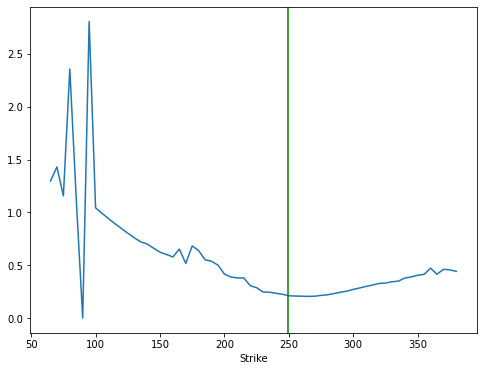

In [9]:
# para los call de la fecha 1
ax = call06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call06_f1.Underlying_Price.iloc[0], color='g');

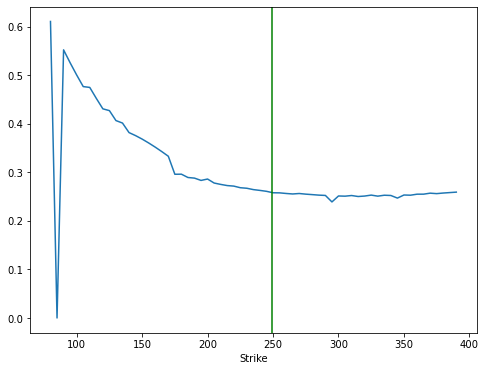

In [10]:
# para los call de la fecha 2
ax = call06_f2.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call06_f2.Underlying_Price.iloc[0], color='g');

In [11]:
mu = ret_ms.mean()
sigma = ret_ms.std()
r = 0.006/360
mu, sigma, r

(0.001328477164498612, 0.017979041435552272, 1.6666666666666667e-05)

In [13]:
opt_deseada = ms_opt.loc[(ms_opt.Type=='call') & (ms_opt.Strike==245) & (ms_opt.Expiry=='2021-09-17')]
opt_deseada

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
992,245.0,2021-09-17,call,...,2021-05-06 23:59:52,2021-05-06 19:59:25,"{'contractSymbol': 'MSFT210917C00245000', 'str..."


In [14]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            245
Expiry                                            2021-09-17 00:00:00
Type                                                             call
Symbol                                            MSFT210917C00245000
Last                                                             16.5
                                          ...                        
Underlying                                                       MSFT
Underlying_Price                                                  250
Quote_Time                                        2021-05-06 23:59:52
Last_Trade_Date                                   2021-05-06 19:59:25
JSON                {'contractSymbol': 'MSFT210917C00245000', 'str...
Name: 992, Length: 19, dtype: object

In [15]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917C00245000',
 'strike': 245.0,
 'currency': 'USD',
 'lastPrice': 16.5,
 'change': 1.9499998,
 'percentChange': 13.40206,
 'volume': 167,
 'openInterest': 2555,
 'bid': 16.25,
 'ask': 16.9,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620331165,
 'impliedVolatility': 0.24115749084472654,
 'inTheMoney': True}

In [16]:
from datetime import date

# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_ms.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

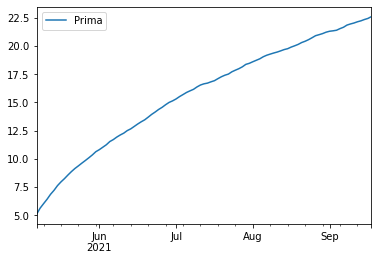

In [17]:
strike = K
call=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0).mean(axis=1)}, index=dates)
call.plot();

In [18]:
call.iloc[-1]

Prima    22.603
Name: 2021-09-17 00:00:00, dtype: float64

### Intervarlos de confianza

In [19]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(21.71470396356019, 23.49173705885186)


In [20]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917C00245000',
 'strike': 245.0,
 'currency': 'USD',
 'lastPrice': 16.5,
 'change': 1.9499998,
 'percentChange': 13.40206,
 'volume': 167,
 'openInterest': 2555,
 'bid': 16.25,
 'ask': 16.9,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620331165,
 'impliedVolatility': 0.24115749084472654,
 'inTheMoney': True}

### 1.2 Histograma de rendimientos

In [21]:
# Centro mis datos en mi tasa libre de riesgo
freq, values = np.histogram(ret_ms-mu+r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

In [22]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_ms.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

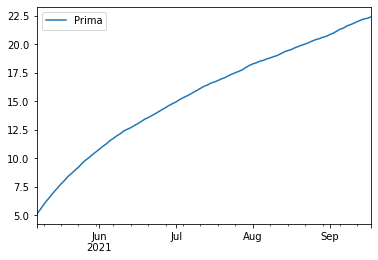

In [23]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
call_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros([ndays,nscen])).T.mean()},index=dates)
call_hist.plot();

In [24]:
call_hist.iloc[-1]

Prima    22.423
Name: 2021-09-17 00:00:00, dtype: float64

In [25]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(21.533480830243224, 23.313052256448035)


In [26]:
opt_valuar['JSON']['lastPrice']

16.5

## 3. Valuación de una opción down and out

In [27]:
mu = ret_ms.mean()
sigma = ret_ms.std()
r = 0.006/360
mu, sigma, r

(0.001328477164498612, 0.017979041435552272, 1.6666666666666667e-05)

In [29]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_ms.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
S0

249.72999572753906

In [30]:
pd.set_option('display.max_columns', 15)

# Precio barrera
B = 240    

# Función de activación (knock-in)
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes < B).cumsum(axis=0) > 0
I

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-05-06,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False
2021-05-07,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False
2021-05-10,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True
2021-05-11,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True
2021-05-12,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,True,False,True,True,True,False,True,...,True,True,True,True,True,True,True
2021-09-14,True,False,True,True,True,False,True,...,True,True,True,True,True,True,True
2021-09-15,True,False,True,True,True,False,True,...,True,True,True,True,True,True,True
2021-09-16,True,False,True,True,True,False,True,...,True,True,True,True,True,True,True


In [31]:
pd.set_option('display.max_columns', 35)

# Función de desactivación (knock-out)
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes > B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-05-06,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2021-05-07,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True
2021-05-10,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
2021-05-11,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,...,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
2021-05-12,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,False,...,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False
2021-09-14,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False
2021-09-15,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False
2021-09-16,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False


In [32]:
K = opt_valuar.Strike
S0 = opt_valuar.Underlying_Price
K, S0

(245.0, 249.51)

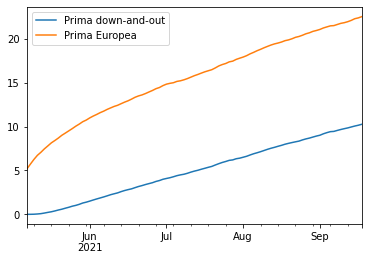

In [33]:
# Definir barrera
B = 240
# Crear función indicadora
I = (sim_closes < B).cumsum(axis=0) > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
callui = pd.DataFrame({'Prima down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - strike, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = callui.plot();
call.plot(ax=ax);

In [34]:
call.iloc[-1]

Prima Europea    22.536
Name: 2021-09-17 00:00:00, dtype: float64

In [35]:
callui.iloc[-1]

Prima down-and-out    10.263
Name: 2021-09-17 00:00:00, dtype: float64

## Put

In [36]:
fecha1 = '2021-06-18'
fecha2 = '2022-09-16'
put06_f1 = ms_opt.loc[(ms_opt.Expiry== fecha1) & (ms_opt.Type=='put')]
put06_f2 = ms_opt.loc[(ms_opt.Expiry== fecha2) & (ms_opt.Type=='put')]
put06_f1

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
1,65.0,2021-06-18,put,MSFT210618P00065000,0.01,0.00,0.01,0.0,0.0,7.0,2477.0,1.156,MSFT,False,MSFT,249.51,2021-05-06 23:59:52,2021-04-30 16:16:58,"{'contractSymbol': 'MSFT210618P00065000', 'str..."
3,70.0,2021-06-18,put,MSFT210618P00070000,0.01,0.00,0.01,0.0,0.0,44.0,12615.0,1.094,MSFT,False,MSFT,249.51,2021-05-06 23:59:52,2021-04-23 16:08:57,"{'contractSymbol': 'MSFT210618P00070000', 'str..."
7,75.0,2021-06-18,put,MSFT210618P00075000,0.04,0.00,0.03,0.0,0.0,26.0,665.0,1.141,MSFT,False,MSFT,249.51,2021-05-06 23:59:52,2021-04-28 19:15:33,"{'contractSymbol': 'MSFT210618P00075000', 'str..."
11,80.0,2021-06-18,put,MSFT210618P00080000,0.02,0.00,0.02,0.0,0.0,2.0,1130.0,1.047,MSFT,False,MSFT,249.51,2021-05-06 23:59:52,2021-05-04 18:05:57,"{'contractSymbol': 'MSFT210618P00080000', 'str..."
21,85.0,2021-06-18,put,MSFT210618P00085000,0.04,0.00,0.05,0.0,0.0,11.0,129.0,1.070,MSFT,False,MSFT,249.51,2021-05-06 23:59:52,2021-04-09 16:02:14,"{'contractSymbol': 'MSFT210618P00085000', 'str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,335.0,2021-06-18,put,MSFT210618P00335000,81.15,84.70,87.65,0.0,0.0,16.0,41.0,0.503,MSFT,False,MSFT,249.51,2021-05-06 23:59:52,2021-04-28 18:12:15,"{'contractSymbol': 'MSFT210618P00335000', 'str..."
1681,340.0,2021-06-18,put,MSFT210618P00340000,87.90,89.65,92.65,0.0,0.0,6.0,25.0,0.520,MSFT,False,MSFT,249.51,2021-05-06 23:59:52,2021-04-09 13:41:03,"{'contractSymbol': 'MSFT210618P00340000', 'str..."
1706,345.0,2021-06-18,put,MSFT210618P00345000,91.05,94.55,96.90,0.0,0.0,9.0,10.0,0.611,MSFT,False,MSFT,249.51,2021-05-06 23:59:52,2021-04-28 17:36:42,"{'contractSymbol': 'MSFT210618P00345000', 'str..."
1728,350.0,2021-06-18,put,MSFT210618P00350000,96.19,98.85,102.65,0.0,0.0,24.0,26.0,0.502,MSFT,False,MSFT,249.51,2021-05-06 23:59:52,2021-04-28 18:04:16,"{'contractSymbol': 'MSFT210618P00350000', 'str..."


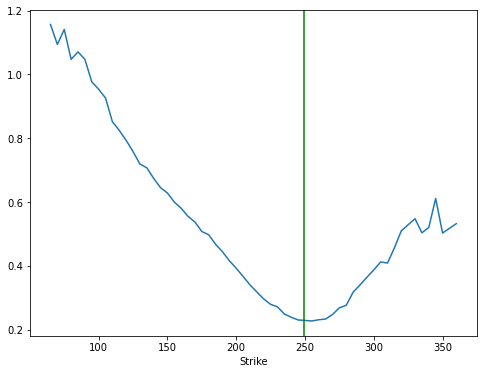

In [37]:
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g')

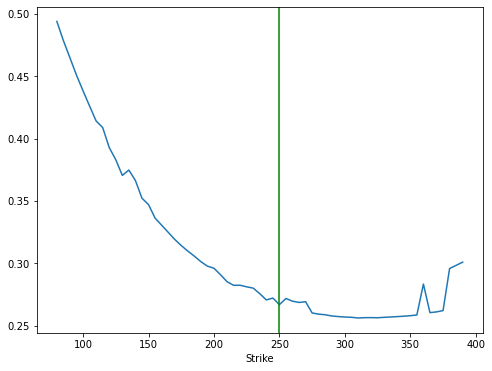

In [38]:
ax = put06_f2.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f2.Underlying_Price.iloc[0], color='g')

In [39]:
mu = ret_ms.mean()
sigma = ret_ms.std()
r = 0.006/360
mu, sigma, r

(0.001328477164498612, 0.017979041435552272, 1.6666666666666667e-05)

In [41]:
opt_deseada = ms_opt.loc[(ms_opt.Type=='put') & (ms_opt.Strike==245) & (ms_opt.Expiry=='2021-09-17')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
993,245.0,2021-09-17,put,MSFT210917P00245000,13.7,12.1,12.6,0.0,0.0,230.0,3580.0,0.249,MSFT,False,MSFT,249.51,2021-05-06 23:59:52,2021-05-06 19:00:05,"{'contractSymbol': 'MSFT210917P00245000', 'str..."


In [42]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar

Strike                                                            245
Expiry                                            2021-09-17 00:00:00
Type                                                              put
Symbol                                            MSFT210917P00245000
Last                                                             13.7
                                          ...                        
Underlying                                                       MSFT
Underlying_Price                                                  250
Quote_Time                                        2021-05-06 23:59:52
Last_Trade_Date                                   2021-05-06 19:00:05
JSON                {'contractSymbol': 'MSFT210917P00245000', 'str...
Name: 993, Length: 19, dtype: object

In [43]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917P00245000',
 'strike': 245.0,
 'currency': 'USD',
 'lastPrice': 13.7,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 230,
 'openInterest': 3580,
 'bid': 12.1,
 'ask': 12.6,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620327605,
 'impliedVolatility': 0.24860370544433597,
 'inTheMoney': False}

### Simulación de precios

In [44]:
from datetime import date

# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_ms.iloc[-1]
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

### Valuación de la opción baśandonos en la función de pago correspondiente (Europea)

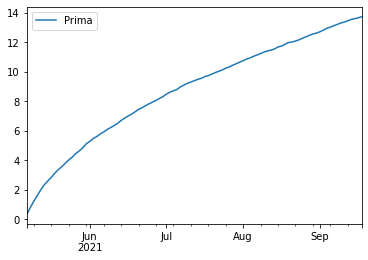

In [45]:
strike = K
put=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

In [46]:
put.iloc[-1]

Prima    13.741
Name: 2021-09-17 00:00:00, dtype: float64

### Intervarlos de confianza

In [47]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(12.841984964760172, 14.640224510070812)


In [48]:
opt_valuar['JSON']

{'contractSymbol': 'MSFT210917P00245000',
 'strike': 245.0,
 'currency': 'USD',
 'lastPrice': 13.7,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 230,
 'openInterest': 3580,
 'bid': 12.1,
 'ask': 12.6,
 'contractSize': 'REGULAR',
 'expiration': 1631836800,
 'lastTradeDate': 1620327605,
 'impliedVolatility': 0.24860370544433597,
 'inTheMoney': False}

### 1.2 Histograma de rendimientos

In [49]:
# Centro mis datos en mi tasa libre de riesgo
freq, values = np.histogram(ret_ms-mu+r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

In [50]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_ms.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())

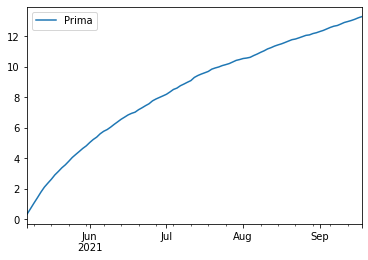

In [51]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
put_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes_hist,np.zeros([ndays,nscen])).T.mean()},index=dates)
put_hist.plot();

In [52]:
put_hist.iloc[-1]

Prima    13.275
Name: 2021-09-17 00:00:00, dtype: float64

In [53]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(12.391133965480726, 14.15818129113774)


In [54]:
opt_valuar['JSON']['lastPrice']

13.7

## 3. Valuación de una opción up and out

In [55]:
mu = ret_ms.mean()
sigma = ret_ms.std()
r = 0.006/360
mu, sigma, r

(0.001328477164498612, 0.017979041435552272, 1.6666666666666667e-05)

In [56]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_ms.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
S0

249.72999572753906

In [57]:
pd.set_option('display.max_columns', 15)

# Precio barrera
B = 260

# Función de activación (knock-in)
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes > B).cumsum(axis=0) > 0
I

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-05-06,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False
2021-05-07,True,True,False,True,False,False,False,...,True,False,False,False,False,False,False
2021-05-10,True,True,False,True,False,False,False,...,True,True,False,False,False,False,False
2021-05-11,True,True,False,True,False,False,True,...,True,True,False,False,False,False,False
2021-05-12,True,True,False,True,False,False,True,...,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False
2021-09-14,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False
2021-09-15,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False
2021-09-16,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False


In [58]:
pd.set_option('display.max_columns', 35)

# Función de desactivación (knock-out)
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes < B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-05-06,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2021-05-07,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True,True,True
2021-05-10,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,True,True,True,True,True,False,False,True,True,True,True,True
2021-05-11,False,False,True,False,True,True,False,True,True,True,True,True,True,False,True,False,True,...,True,True,True,False,False,True,True,True,True,True,False,False,True,True,True,True,True
2021-05-12,False,False,True,False,True,True,False,True,True,True,True,True,True,False,True,False,True,...,True,True,True,False,False,True,True,True,True,True,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True
2021-09-14,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True
2021-09-15,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True
2021-09-16,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True


## Valuación opción call up-and-out

In [59]:
K = opt_valuar.Strike
S0 = opt_valuar.Underlying_Price
K, S0

(245.0, 249.51)

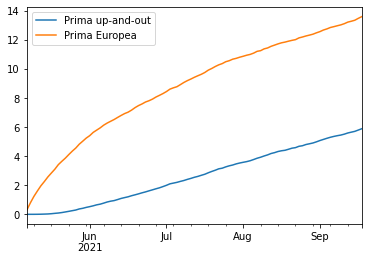

In [60]:
# Definir barrera
B = 260
# Crear función indicadora
I = (sim_closes > B).cumsum(axis=0) > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
put = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
putui = pd.DataFrame({'Prima up-and-out':np.exp(-r*ndays)*(I * np.fmax(strike - sim_closes, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = putui.plot();
put.plot(ax=ax);

In [61]:
put.iloc[-1]

Prima Europea    13.581
Name: 2021-09-17 00:00:00, dtype: float64

In [62]:
putui.iloc[-1]

Prima up-and-out    5.879
Name: 2021-09-17 00:00:00, dtype: float64

## RESPUESTA ARANZAZU

In [28]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import date
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [29]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

In [30]:
closes = get_adj_closes(['MSFT'], '2017-01-01')
closes_msft = closes.loc[:,'MSFT']
# Último precio
closes_msft[-1]

252.4600067138672

In [31]:
# Rendimeintos
ret_msft = calc_daily_ret(closes_msft)

In [32]:
# Datos de opciones
pd.set_option('display.max_rows', 10)

msft = web.YahooOptions('MSFT')
msft_opt = msft.get_all_data().reset_index()
msft_opt.set_index('Expiry').sort_index()#.head(1000)

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-05-07,200.0,call,MSFT210507C00200000,...,2021-05-07 20:00:02,2021-05-05 19:00:24,"{'contractSymbol': 'MSFT210507C00200000', 'str..."
2021-05-07,155.0,put,MSFT210507P00155000,...,2021-05-07 20:00:02,2021-04-23 17:46:50,"{'contractSymbol': 'MSFT210507P00155000', 'str..."
2021-05-07,120.0,put,MSFT210507P00120000,...,2021-05-07 20:00:02,2021-05-03 13:30:01,"{'contractSymbol': 'MSFT210507P00120000', 'str..."
2021-05-07,120.0,call,MSFT210507C00120000,...,2021-05-07 20:00:02,2021-05-06 19:59:12,"{'contractSymbol': 'MSFT210507C00120000', 'str..."
2021-05-07,252.5,put,MSFT210507P00252500,...,2021-05-07 20:00:02,2021-05-07 19:52:43,"{'contractSymbol': 'MSFT210507P00252500', 'str..."
...,...,...,...,...,...,...,...
2023-06-16,285.0,call,MSFT230616C00285000,...,2021-05-07 20:00:02,2021-05-07 17:15:37,"{'contractSymbol': 'MSFT230616C00285000', 'str..."
2023-06-16,285.0,put,MSFT230616P00285000,...,2021-05-07 20:00:02,2021-04-29 19:07:08,"{'contractSymbol': 'MSFT230616P00285000', 'str..."
2023-06-16,290.0,call,MSFT230616C00290000,...,2021-05-07 20:00:02,2021-05-07 13:40:37,"{'contractSymbol': 'MSFT230616C00290000', 'str..."


In [33]:
# Opción a evaluar
opt_deseada = msft_opt.loc[(msft_opt.Type=='call') & (msft_opt.Strike==255) & (msft_opt.Expiry=='2021-09-17')]
opt_deseada

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1088,255.0,2021-09-17,call,...,2021-05-07 20:00:02,2021-05-07 19:36:57,"{'contractSymbol': 'MSFT210917C00255000', 'str..."


In [34]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar
# VALOR DE LA PRIMA = 11.2

Strike                                                            255
Expiry                                            2021-09-17 00:00:00
Type                                                             call
Symbol                                            MSFT210917C00255000
Last                                                             12.7
                                          ...                        
Underlying                                                       MSFT
Underlying_Price                                                  252
Quote_Time                                        2021-05-07 20:00:02
Last_Trade_Date                                   2021-05-07 19:36:57
JSON                {'contractSymbol': 'MSFT210917C00255000', 'str...
Name: 1088, Length: 19, dtype: object

In [35]:
# Mu, Sigma, R
mu = ret_msft.mean()
sigma = ret_msft.std()
r = (0.06/100)/360
mu, sigma, r

(0.0013372091431082397, 0.017973125956476325, 1.6666666666666665e-06)

In [36]:
# SIMULAR PRECIOS
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_appl.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
S0

252.4600067138672

Prima    17.379
Name: 2021-09-17 00:00:00, dtype: float64

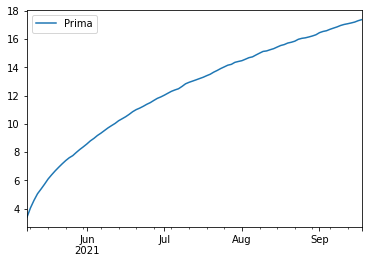

In [37]:
strike = K
put=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();
put.iloc[-1]

In [38]:
# Spot price
opt_valuar.Underlying_Price

252.46

# 'CALL'- down-and-out
- strike price > spot price > barrier price

In [39]:
pd.set_option('display.max_columns', 15)

# Precio barrera
B = 245  

I = (sim_closes < B).cumsum(axis=0)# > 0
I

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-05-07,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0
2021-05-10,0,0,0,0,0,0,0,...,0,2,0,2,1,0,0
2021-05-11,0,0,0,0,0,0,1,...,0,3,0,2,2,1,0
2021-05-12,0,0,0,0,0,0,2,...,0,4,1,2,3,2,0
2021-05-13,0,0,0,0,0,0,3,...,0,5,1,2,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,0,0,20,0,44,49,90,...,1,43,5,7,33,53,54
2021-09-14,0,0,20,0,44,49,91,...,1,43,5,8,34,53,54
2021-09-15,0,0,20,0,45,49,92,...,1,43,5,9,35,53,55
2021-09-16,0,0,20,0,46,49,93,...,1,43,5,9,36,53,55


In [40]:
# call down-and-out
K = opt_valuar.Strike
S0 = opt_valuar.Underlying_Price
K, S0, B
# mi strike esta por arriba del spot, y el spot esta por arriba del barrera

(255.0, 252.46, 245)

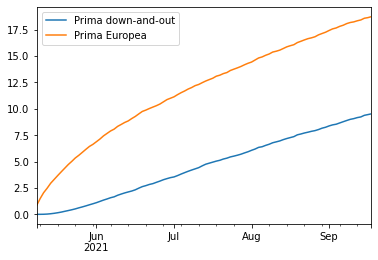

In [41]:
# Definir barrera por debajo del spot
B = 245
# Pongo una barrera donde creo que puede llegar

# Crear función indicadora #se activa cuando el precio supera la barrera
I = (sim_closes < B).cumsum(axis=0) > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
calldo = pd.DataFrame({'Prima down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - strike, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = calldo.plot();
call.plot(ax=ax);

In [42]:
call.iloc[-1]

Prima Europea    18.72
Name: 2021-09-17 00:00:00, dtype: float64

In [43]:
# barrera
calldo.iloc[-1]

Prima down-and-out    9.515
Name: 2021-09-17 00:00:00, dtype: float64

Podemos ver que con la opción barrera realmente logramos abaratar la opción europea, con un valor de strike un poco mas abajo del spot, logramos redur su costo, pues en este caso (down and out), se desactiva al pasar del strike.

# 'PUT'- Up-and-out
- barrier price > spot price> strike price

In [44]:
# Opción a evaluar
opt_deseada = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Strike==240) & (msft_opt.Expiry=='2021-09-17')]
opt_deseada

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,...,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
945,240.0,2021-09-17,put,MSFT210917P00240000,9.1,8.75,9.0,...,MSFT,False,MSFT,252.46,2021-05-07 20:00:02,2021-05-07 18:16:49,"{'contractSymbol': 'MSFT210917P00240000', 'str..."


In [45]:
opt_valuar = opt_deseada.loc[list(opt_deseada.index)[0]]
opt_valuar
# VALOR DE LA PRIMA = 11.4

Strike                                                            240
Expiry                                            2021-09-17 00:00:00
Type                                                              put
Symbol                                            MSFT210917P00240000
Last                                                              9.1
                                          ...                        
Underlying                                                       MSFT
Underlying_Price                                                  252
Quote_Time                                        2021-05-07 20:00:02
Last_Trade_Date                                   2021-05-07 18:16:49
JSON                {'contractSymbol': 'MSFT210917P00240000', 'str...
Name: 945, Length: 19, dtype: object

In [46]:
# Mu, Sigma, R
mu = ret_msft.mean()
sigma = ret_msft.std()
r = (0.06/100)/360
mu, sigma, r

(0.0013372091431082397, 0.017973125956476325, 1.6666666666666665e-06)

In [47]:
# SIMULAR PRECIOS
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = opt_valuar.Expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = opt_valuar.Strike
S0 = closes_appl.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
S0

252.4600067138672

Prima    10.295
Name: 2021-09-17 00:00:00, dtype: float64

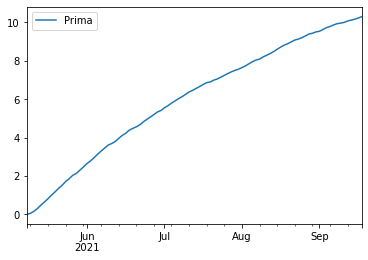

In [48]:
strike = K
put=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();
put.iloc[-1]

In [49]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(9.404708612989136, 11.18481054858584)


In [50]:
pd.set_option('display.max_columns', 15)

# Precio barrera
B = 255

# Función de activación (knock-in)
# Si en algún momento el precio toca la barrera la opción se desactiva
# por lo tanto esta activo cuando el precio es mayor a la barrera
I = (sim_closes > B).cumsum(axis=0) > 0
I

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-05-07,False,False,True,False,False,True,False,...,False,False,True,False,True,True,False
2021-05-10,False,False,True,True,False,True,False,...,False,False,True,False,True,True,False
2021-05-11,False,False,True,True,False,True,False,...,False,False,True,False,True,True,True
2021-05-12,True,False,True,True,False,True,False,...,False,False,True,False,True,True,True
2021-05-13,True,False,True,True,False,True,False,...,False,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,True,True,True,True,True,True,False,...,True,False,True,False,True,True,True
2021-09-14,True,True,True,True,True,True,False,...,True,False,True,False,True,True,True
2021-09-15,True,True,True,True,True,True,False,...,True,False,True,False,True,True,True
2021-09-16,True,True,True,True,True,True,False,...,True,False,True,False,True,True,True


In [51]:
K = opt_valuar.Strike
S0 = opt_valuar.Underlying_Price
K, S0, B

(240.0, 252.46, 255)

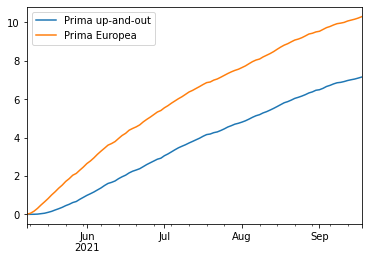

In [52]:
# Definir barrera
B = 255
# Crear función indicadora
I = (sim_closes > B).cumsum(axis=0) > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
put = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike - sim_closes, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
putuo = pd.DataFrame({'Prima up-and-out':np.exp(-r*ndays)*(I * np.fmax(strike - sim_closes, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = putuo.plot();
put.plot(ax=ax);

In [53]:
put.iloc[-1]

Prima Europea    10.295
Name: 2021-09-17 00:00:00, dtype: float64

In [54]:
putuo.iloc[-1]

Prima up-and-out    7.149
Name: 2021-09-17 00:00:00, dtype: float64

Podemos ver que la opción barrera realmente puede abaratar la opción Europea, aun que en este caso elstrike price esta tan solo un poco por encima del spot, se logra reducir el costo de manera considerable.